# מידע כללי

# שם הפרוייקט: "ufc-מדדים"
### (49 : מספר קבוצה)
### מגישים: נריה מועלמי
### ברק ליבר

In [1]:
#imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import requests
from PIL import Image
from io import BytesIO


In [2]:
#Read the CSV

url='https://raw.githubusercontent.com/barakliver/UFC-Complete-Dataset-All-events-1996-2024-project/main/fighter_stats%20(2).csv'
ufc_df= pd.read_csv(url)
ufc_df.head()

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6


הסבר עמודות
> 
**name** - שם הלוחם. זה המזהה הראשי של כל שורה בנתונים. <br>
**wins** - מספר הניצחונות הכולל של הלוחם בקריירה המקצועית שלו ב-UFC. <br>
**losses** - מספר ההפסדים הכולל של הלוחם בקריירה המקצועית שלו ב-UFC. <br>
**height** - גובה הלוחם בסנטימטרים. זה מדד חשוב שיכול להשפיע על הישג ואסטרטגיית הקרב. <br>
**weight** - משקל הלוחם בקילוגרמים. זה קובע את קטגוריית המשקל בה הלוחם מתחרה. <br>
**reach** - עמידה מועדפת של הלוחם. "Orthodox" מתייחס לעמידה ימנית (יד ימין מאחור), ו-"Southpaw" לעמידה שמאלית (יד שמאל מאחור). <br>
**stance** -  עמידה מועדפת של הלוחם. "Orthodox" מתייחס לעמידה ימנית (יד ימין מאחור), ו-"Southpaw" לעמידה שמאלית (יד שמאל מאחור). <br>
**age** - גיל הלוחם. גורם חשוב שיכול להשפיע על ביצועים ועל שלב הקריירה. <br>
**SLpM** - מספר החבטות המשמעותיות שהלוחם נותן בממוצע בדקה. מדד זה מצביע על קצב ההתקפה של הלוחם. <br>
**sig_str_acc** - דיוק החבטות המשמעותיות, מוצג כשבר עשרוני. למשל, 0.40 מייצג 40% דיוק. <br>
**SApM** - מספר החבטות המשמעותיות שהלוחם סופג בממוצע בדקה. זה מדד להגנה של הלוחם. <br>
**str_def** - אחוז ההגנה מפני חבטות, מוצג כשבר עשרוני. למשל, 0.61 מייצג 61% הגנה מוצלחת מפני חבטות. <br>
**td_avg** - ממוצע ההפלות לקרב. זה מראה כמה פעמים בממוצע הלוחם מצליח להפיל את יריבו לקרקע בכל קרב. <br>
**td_acc** - דיוק ההפלות, מוצג כשבר עשרוני. זה מציין את אחוז הצלחת ניסיונות ההפלה של הלוחם. <br>
**td_def** - אחוז ההגנה מפני הפלות, מוצג כשבר עשרוני. זה מציין באיזו תדירות הלוחם מצליח למנוע הפלות מצד היריב. <br>
**sub_avg** - ממוצע הכניעות לקרב. זה מציין כמה פעמים בממוצע הלוחם מצליח לגרום ליריב להיכנע בכל קרב. <br>



#ufc_df.shape()

In [20]:
ufc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          2478 non-null   object  
 1   wins          2478 non-null   float64 
 2   losses        2478 non-null   float64 
 3   height        2478 non-null   float64 
 4   weight        2478 non-null   float64 
 5   reach         1823 non-null   float64 
 6   stance        2401 non-null   object  
 7   age           2318 non-null   float64 
 8   SLpM          2478 non-null   float64 
 9   sig_str_acc   2478 non-null   float64 
 10  SApM          2478 non-null   float64 
 11  str_def       2478 non-null   float64 
 12  td_avg        2478 non-null   float64 
 13  td_acc        2478 non-null   float64 
 14  td_def        2478 non-null   float64 
 15  sub_avg       2478 non-null   float64 
 16  win_ratio     2478 non-null   float64 
 17  age_group     2306 non-null   category
 18  height_g

In [21]:
#missing values

ufc_df.isnull().sum()

name              1
wins              1
losses            1
height            1
weight            1
reach           656
stance           78
age             161
SLpM              1
sig_str_acc       1
SApM              1
str_def           1
td_avg            1
td_acc            1
td_def            1
sub_avg           1
win_ratio         1
age_group       173
height_group      1
dtype: int64

In [6]:
#General Info

fighter_count = len(ufc_df)

print("=" * 40)
print(f"{'מספר הלוחמים בטבלה':^40}")
print("=" * 40)
print(f"{fighter_count:^40}")
print("=" * 40)

unique_stances = ufc_df['stance'].nunique()
print(f"מספר סוגי עמידות ייחודיות: {unique_stances}")

# הצגת התפלגות העמידות
stance_distribution = ufc_df['stance'].value_counts()
print("\nהתפלגות סוגי העמידות:")
for stance, count in stance_distribution.items():
    print(f"{stance:<15}: {count:>5} ({count/fighter_count*100:.1f}%)")

           מספר הלוחמים בטבלה           
                  2479                  
מספר סוגי עמידות ייחודיות: 5

התפלגות סוגי העמידות:
Orthodox       :  1840 (74.2%)
Southpaw       :   412 (16.6%)
Switch         :   140 (5.6%)
Open Stance    :     6 (0.2%)
Sideways       :     3 (0.1%)


In [47]:
valid_weights = ufc_df['weight'].dropna()
# חישוב האחוזונים
percentiles = np.percentile(valid_weights, [25, 50, 75])

# יצירת מילון עם התוצאות
percentile_dict = {
    '25%': percentiles[0],
    '50%': percentiles[1],
    '75%': percentiles[2]
}

# הדפסה מעוצבת
print("=" * 40)
print(f"{'אחוזוני משקל הלוחמים (בק״ג)':^40}")
print("=" * 40)
for percentile, value in percentile_dict.items():
    print(f"{percentile:<15}: {value:>20.2f}")
print("=" * 40)

# חישוב וחלוקה לקבוצות משקל
weight_ranges = pd.cut(valid_weights, 
                       bins=[percentiles[0], percentiles[1], percentiles[2], float('inf')],
                       labels=['קל', 'בינוני','כבד'])

weight_distribution = weight_ranges.value_counts().sort_index()

print("\nהתפלגות הלוחמים לפי קבוצות משקל:")
for category, count in weight_distribution.items():
    percentage = count / len(valid_weights) * 100
    print(f"{category:<12}: {count:>5} ({percentage:>6.2f}%)")

# מציאת הלוחם הכבד ביותר והקל ביותר
heaviest_fighter = ufc_df.loc[ufc_df['weight'].idxmax()]
lightest_fighter = ufc_df.loc[ufc_df['weight'].replace(0, np.nan).idxmin()]

      אחוזוני משקל הלוחמים (בק״ג)       
25%            :                65.77
50%            :                77.11
75%            :                83.91

התפלגות הלוחמים לפי קבוצות משקל:
קל          :   814 ( 32.85%)
בינוני      :   312 ( 12.59%)
כבד         :   520 ( 20.98%)


הלוחם הכבד ביותר: Emmanuel Yarborough (349.27 ק״ג)


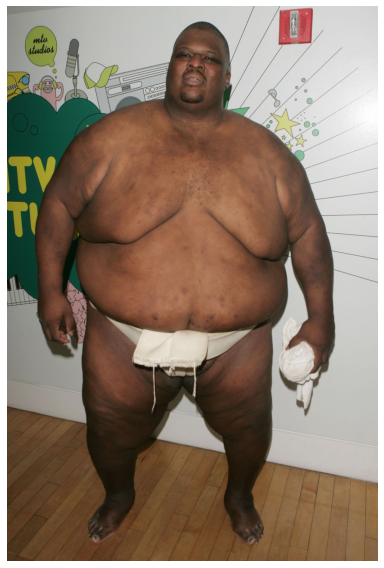

In [70]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL של התמונה
url = "https://encrypted-tbn0.gstatic.com/licensed-image?q=tbn:ANd9GcQq9yKgoyETVrYQOi8bfGXmKqPEv4jfbNZOQhl9LDQAMIaLR9BQjDJeFMqzAxIYD-iHohlNNZ18jrVh-fE"

# הורדת התמונה
response = requests.get(url)
img = Image.open(BytesIO(response.content))


plt.figure(figsize=(8, 8))

# הצגת התמונה
plt.imshow(img)
plt.axis('off')  # מסיר את הצירים

# התאמת התמונה לגודל החלון
plt.tight_layout()
print(f"הלוחם הכבד ביותר: {heaviest_fighter['name']} ({heaviest_fighter['weight']:.2f} ק״ג)")
plt.show()

הלוחם הקל ביותר: Jaqueline Amorim (52.16 ק״ג)


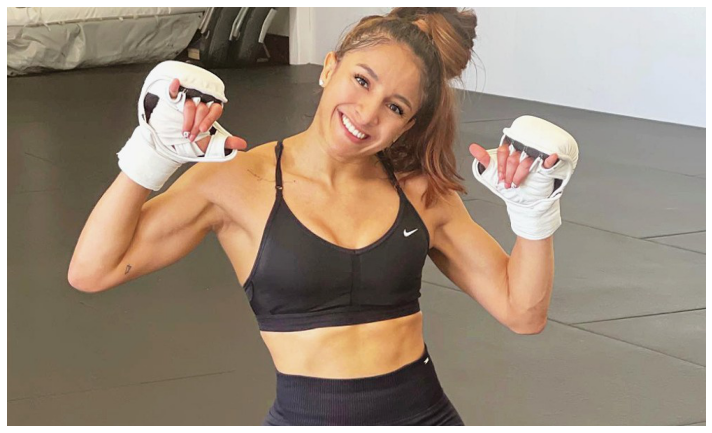

In [60]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL של התמונה
url = "https://mmajunkie.usatoday.com/wp-content/uploads/sites/91/2022/02/jaquelina-amorim.jpg?w=1000&h=600&crop=1"

# הורדת התמונה
response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.figure(figsize=(10, 10))

# הצגת התמונה
plt.imshow(img)
plt.axis('off')  # מסיר את הצירים

# התאמת התמונה לגודל החלון
plt.tight_layout()
print(f"הלוחם הקל ביותר: {lightest_fighter['name']} ({lightest_fighter['weight']:.2f} ק״ג)")
plt.show()





<AxesSubplot:>

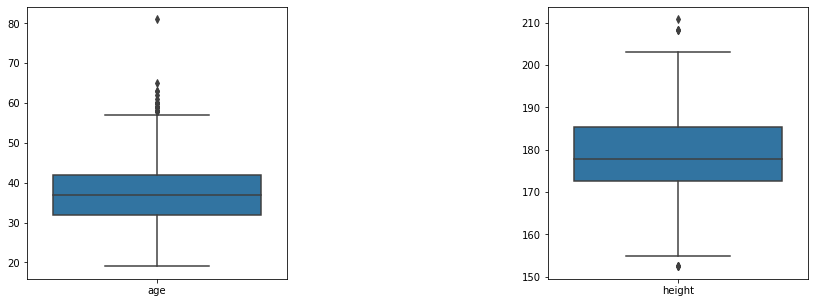

In [22]:
# התפלגויות

fig ,ax=plt.subplots (figsize=(14,5), ncols=2)
plt.subplots_adjust(wspace=1)
sns.boxplot(data=ufc_df[['age']], ax=ax[0])
sns.boxplot(data=ufc_df[['height']], ax=ax[1])        

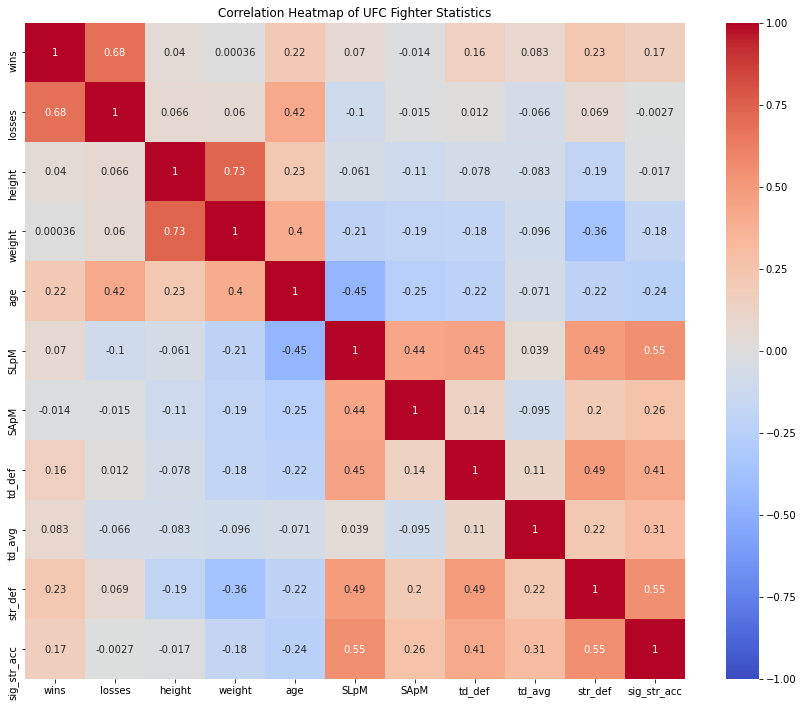

In [25]:

correlation_matrix = ufc_df[['wins','losses','height','weight', 'age','SLpM', 'SApM','td_def','td_avg','str_def','sig_str_acc']].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of UFC Fighter Statistics')
plt.tight_layout()
plt.show()




# מסקנה ראשונה

In [14]:
#עמודה חדשה: יחס הניצחונות למספר המשחקים
#עמודה חדשה: טווחי גילאים כל 5 שנים

ufc_df['win_ratio'] = ufc_df['wins'] / (ufc_df['wins'] + ufc_df['losses'])
ufc_df['age_group'] = pd.cut(ufc_df['age'], bins=range(15, 61, 5), right=False)

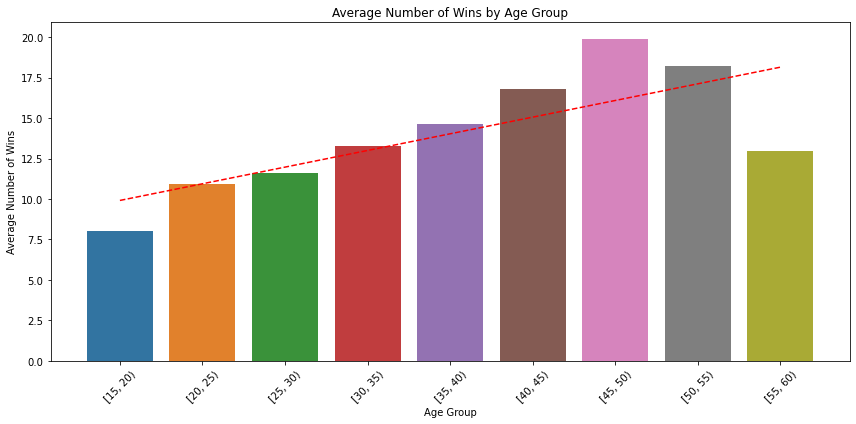

Correlation between age and average wins: 0.75

Average wins by age group:
  age_group       wins age_mid
0  [15, 20)   8.000000    17.5
1  [20, 25)  10.920000    22.5
2  [25, 30)  11.614173    27.5
3  [30, 35)  13.254973    32.5
4  [35, 40)  14.613419    37.5
5  [40, 45)  16.790598    42.5
6  [45, 50)  19.921488    47.5
7  [50, 55)  18.193548    52.5
8  [55, 60)  12.954545    57.5


In [15]:


# חישוב ממוצע הניצחונות לכל קבוצת גיל
age_wins = ufc_df.groupby('age_group')['wins'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='wins', data=age_wins)

# הוספת קו מגמה
x = np.arange(len(age_wins))
z = np.polyfit(x, age_wins['wins'], 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.title('Average Number of Wins by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# חישוב מתאם בין מרכז קבוצת הגיל לממוצע הניצחונות
age_wins['age_mid'] = age_wins['age_group'].apply(lambda x: x.mid)
correlation = age_wins['age_mid'].corr(age_wins['wins'])

print(f"Correlation between age and average wins: {correlation:.2f}")


print("\nAverage wins by age group:")
print(age_wins)

<span style="font-size:larger;">ניתן לראות קשר חיובי חזק בין קבוצת הגיל לבין מספר הניצחונות. ככל שהמתאמן גדל יש לו יותר ניצחונות   </span>

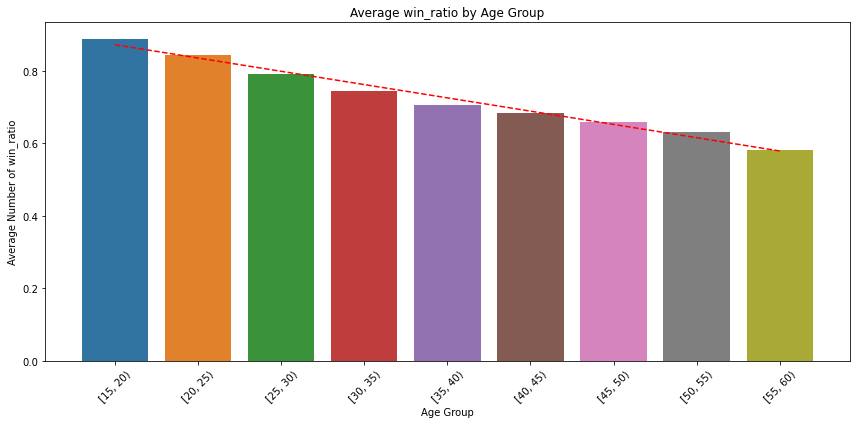

Correlation between age and average win_ratio: -0.99

Average win_ratio by age group:
  age_group  win_ratio age_mid
0  [15, 20)   0.888889    17.5
1  [20, 25)   0.844635    22.5
2  [25, 30)   0.791850    27.5
3  [30, 35)   0.742833    32.5
4  [35, 40)   0.704706    37.5
5  [40, 45)   0.682417    42.5
6  [45, 50)   0.659117    47.5
7  [50, 55)   0.631204    52.5
8  [55, 60)   0.580858    57.5


In [16]:

ufc_df['age_group'] = pd.cut(ufc_df['age'], bins=range(15, 61, 5), right=False)

# חישוב ממוצע הניצחונות לכל קבוצת גיל
age_wins = ufc_df.groupby('age_group')['win_ratio'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='win_ratio', data=age_wins)

# הוספת קו מגמה
x = np.arange(len(age_wins))
z = np.polyfit(x, age_wins['win_ratio'], 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

plt.title('Average win_ratio by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of win_ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# חישוב מתאם בין מרכז קבוצת הגיל לממוצע הניצחונות
age_wins['age_mid'] = age_wins['age_group'].apply(lambda x: x.mid)
correlation = age_wins['age_mid'].corr(age_wins['win_ratio'])

print(f"Correlation between age and average win_ratio: {correlation:.2f}")

# הצגת הנתונים
print("\nAverage win_ratio by age group:")
print(age_wins)

<span style="font-size:larger;">כאן כבר ניתן להגיד משהו חכם יותר, אנחנו רואים שככל שאנשים מתבגרים יחס הניצחונות ביחס לכמות המשחקים יורד משמע הביצועים יורדים </span>

# מסקנה שנייה

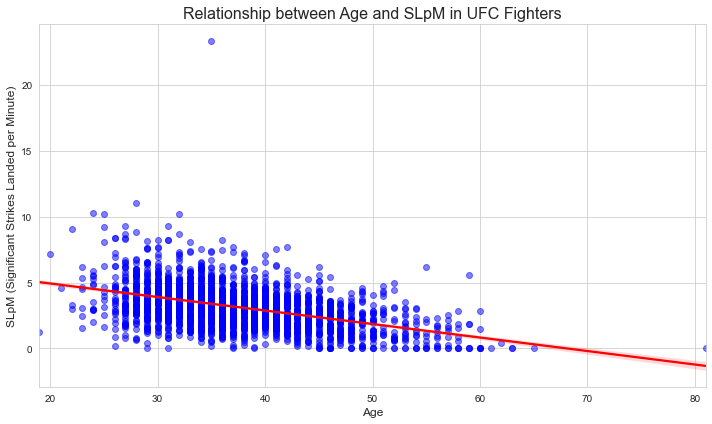

עוצמת הקשר היא: -0.45


In [69]:
# יצירת הגרף
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")


sns.regplot(x='age', y='SLpM', data=ufc_df, 
            scatter_kws={'alpha':0.5, 'color':'blue'}, 
            line_kws={'color':'red'})


plt.title('Relationship between Age and SLpM in UFC Fighters', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('SLpM (Significant Strikes Landed per Minute)', fontsize=12)


# שיפור הנראות של הגרף
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()


plt.show()


correlation = ufc_df['age'].corr(ufc_df['SLpM'])


print(f"עוצמת הקשר היא: {correlation:.2f}")

<span style="font-size:larger;"> גיל זה נושא מעניין אנחנו רואים קשר שלילי בינוני, שככל שהגיל גודל מספר החבטות בממוצע יורד, הלוחמים נהיים יותר זהירים עם הגיל? נראה כך.   </span>

# מסקנה שלישית

In [85]:
ufc_df['stance'].unique()

array(['Orthodox', 'Southpaw', 'Switch', nan, 'Open Stance', 'Sideways'],
      dtype=object)

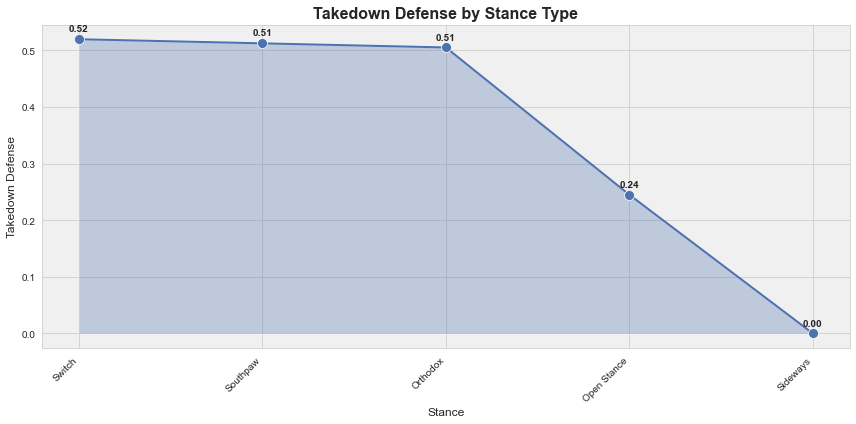

In [88]:
# חישוב ממוצע wins_ratio לכל סוג של stance
stance_win_ratio = ufc_df.groupby('stance')['td_def'].mean().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("deep")

ax = sns.lineplot(x=stance_win_ratio.index, y=stance_win_ratio.values, marker='o', linewidth=2, markersize=10)

plt.title('Takedown Defense by Stance Type', fontsize=16, fontweight='bold')
plt.xlabel('Stance', fontsize=12)
plt.ylabel('Takedown Defense', fontsize=12)


# הוספת ערכים מספריים מעל כל נקודה
for i, v in enumerate(stance_win_ratio.values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')


plt.xticks(rotation=45, ha='right')


ax.set_facecolor('#f0f0f0')
plt.fill_between(stance_win_ratio.index, stance_win_ratio.values, alpha=0.3)

plt.tight_layout()
plt.show()

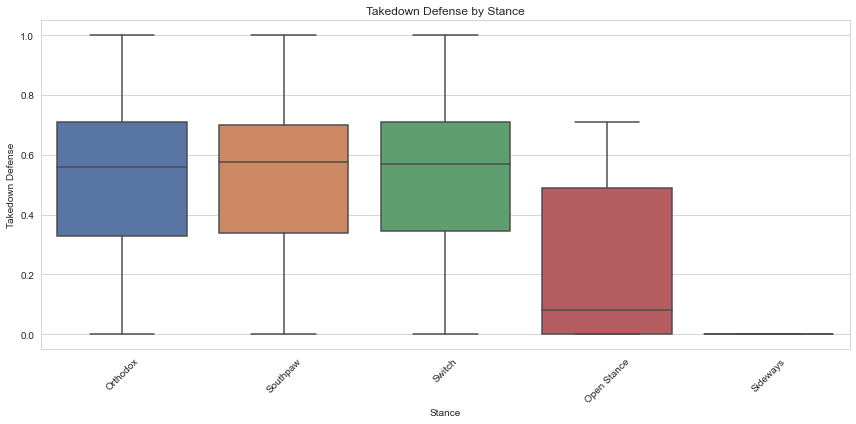

In [98]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='stance', y='td_def', data=ufc_df)
plt.title('Takedown Defense by Stance')
plt.xlabel('Stance')
plt.ylabel('Takedown Defense')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [103]:
open_stance = len(ufc_df[ufc_df["stance"]=="Open Stance"])
print("Number of Open Stance Fighters: ",open_stance)

Number of Open Stance Fighters:  6


<span style="font-size:larger;">נראה שעמידה שמאלית/ימנית לא משפיע על יכולת הגנה מהפלה אך במנח פתוח נראה שקשה יותר להגן מהפלה,   לא פלא שהוא פחות נפוץ</span>